In [28]:
import numpy as np
import pandas as pd
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline
import geojson
import gmaps

# Use google maps api
gmaps.configure (api_key='') # Fill in with your API key

# Locación de Bodegas y Mercados

In [29]:
with open('establecimientos_mercados_bodegas.geojson', 'r', encoding='latin-1') as f:
    data = geojson.load(f)
df = pd.json_normalize(data["features"])
mercados_locations = df[['geometry.coordinates']]
mercados_locations['latitude'] = mercados_locations['geometry.coordinates'].apply(lambda a: a[1])
mercados_locations['longitude'] = mercados_locations['geometry.coordinates'].apply(lambda a: a[0])
mercados_locations = mercados_locations.drop(['geometry.coordinates'], axis = 1)
mercados_locations.to_csv('adgsa.csv')

fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(mercados_locations))
fig

<ipython-input-29-2e933482c98f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mercados_locations['latitude'] = mercados_locations['geometry.coordinates'].apply(lambda a: a[1])
<ipython-input-29-2e933482c98f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mercados_locations['longitude'] = mercados_locations['geometry.coordinates'].apply(lambda a: a[0])


Figure(layout=FigureLayout(height='420px'))

# Fallecidos por Covid

In [30]:
# Reporte del Sistema de Defunciones registrados al 01.05.2021 a las 00:00 horas

#Leemos el archivo
fallecidos = pd.read_csv('fallecidos_sinadef.csv', header=2, sep=';', encoding='latin-1') 

#Creamos una columna adicional para identificar a los que tienen covid
fallecidos['Covid']=0
fallecidos['Covid'][fallecidos['DEBIDO A (CAUSA A)'].str.contains('COVID') | \
          fallecidos['DEBIDO A (CAUSA B)'].str.contains('COVID') | \
          fallecidos['DEBIDO A (CAUSA C)'].str.contains('COVID') | \
          fallecidos['DEBIDO A (CAUSA D)'].str.contains('COVID') | \
          fallecidos['DEBIDO A (CAUSA E)'].str.contains('COVID') | \
          fallecidos['DEBIDO A (CAUSA F)'].str.contains('COVID')] = 1

fallecidos

C:\Users\Sofia\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
<ipython-input-30-f69f5b2ce8ae>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fallecidos['Covid'][fallecidos['DEBIDO A (CAUSA A)'].str.contains('COVID') | \


,Nº,TIPO SEGURO,SEXO,EDAD,TIEMPO EDAD,ESTADO CIVIL,NIVEL DE INSTRUCCIÓN,COD# UBIGEO DOMICILIO,PAIS DOMICILIO,DEPARTAMENTO DOMICILIO,...,CAUSA D (CIE-X),DEBIDO A (CAUSA E),CAUSA E (CIE-X),DEBIDO A (CAUSA F),CAUSA F (CIE-X),Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Covid
0,1,SIS,FEMENINO,93,AÑOS,SOLTERO,NINGUN NIVEL / ILETRADO,92-33-05-06-12-000,PERU,AYACUCHO,...,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,NaN,NaN,NaN,NaN,0
1,2,SIS,MASCULINO,4,AÑOS,SOLTERO,IGNORADO,92-33-21-04-01-000,PERU,SAN MARTIN,...,SIN REGISTRO,PARALISIS CEREBRAL INFANTIL,G809,SIN REGISTRO,SIN REGISTRO,NaN,NaN,NaN,NaN,0
2,3,SIS,FEMENINO,86,AÑOS,SOLTERO,PRIMARIA INCOMPLETA,92-33-21-03-13-000,PERU,SAN MARTIN,...,I10X,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,NaN,NaN,NaN,NaN,0
3,4,SIS,MASCULINO,59,AÑOS,CONVIVIENT/CONCUBINA,PRIMARIA INCOMPLETA,92-33-05-06-12-000,PERU,AYACUCHO,...,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,NaN,NaN,NaN,NaN,0
4,5,IGNORADO,MASCULINO,38,AÑOS,IGNORADO,IGNORADO,93-32-00-00-00-000,FILIPINAS,EXTRANJERO,...,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659162,659163,SIS,MASCULINO,77,AÑOS,CASADO,NINGUN NIVEL / ILETRADO,92-33-05-07-02-101,PERU,AYACUCHO,...,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,NaN,NaN,NaN,NaN,0
659163,659164,SIS,FEMENINO,86,AÑOS,SOLTERO,NINGUN NIVEL / ILETRADO,92-33-05-04-03-101,PERU,AYACUCHO,...,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,NaN,NaN,NaN,NaN,0
659164,659165,SIS,MASCULINO,63,AÑOS,SOLTERO,NINGUN NIVEL / ILETRADO,92-33-02-10-03-102,PERU,ANCASH,...,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,NaN,NaN,NaN,NaN,0
659165,659166,SIS,FEMENINO,78,AÑOS,CASADO,PRIMARIA COMPLETA,92-33-02-10-10-000,PERU,ANCASH,...,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,NaN,NaN,NaN,NaN,0


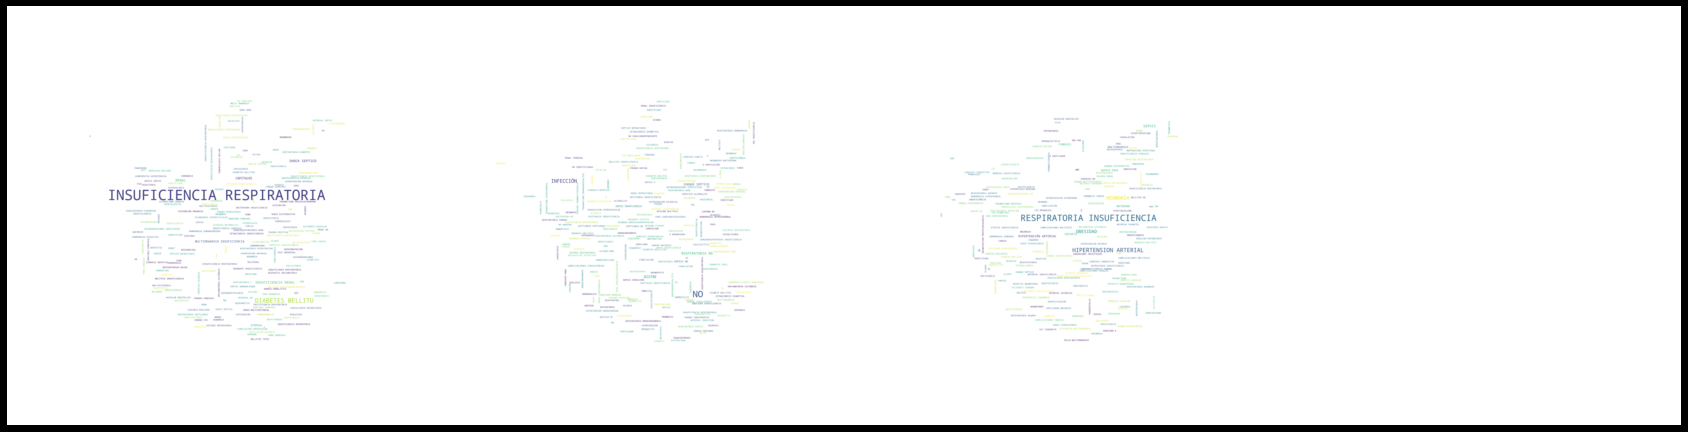

In [46]:
# Genera el texto
text = " ^ ".join(review for review in fallecidos[fallecidos['Covid']==1]['DEBIDO A (CAUSA A)']) + ' ^ ' + \
        " ^ ".join(review for review in fallecidos[fallecidos['Covid']==1]['DEBIDO A (CAUSA B)']) + ' ^ ' + \
        " ^ ".join(review for review in fallecidos[fallecidos['Covid']==1]['DEBIDO A (CAUSA C)']) + ' ^ ' + \
        " ^ ".join(review for review in fallecidos[fallecidos['Covid']==1]['DEBIDO A (CAUSA D)']) + ' ^ ' + \
        " ^ ".join(review for review in fallecidos[fallecidos['Covid']==1]['DEBIDO A (CAUSA E)']) + ' ^ ' + \
        " ^ ".join(review for review in fallecidos[fallecidos['Covid']==1]['DEBIDO A (CAUSA F)'])

# Crea una lista de palabras bloqueadas
#stopwords = set(STOPWORDS)
stopwords = set(['^', 'Covid', 'Coronavirus', 'SIN REGISTRO', 'SIN', 'REGISTRO', 'COVID19', 'CAUSA','POSITIVO','CASO SOSPECHOSO','ADULTO SINDROME','DE DIFICULTAD','SEVERA POR',
                  'AGUDA', 'DE','NEUMONÍA DEBIDA','ESENCIAL PRIMARIA','ESPECIFICADO','SOSPECHOSO DE','GRAVE POR',
                  'VIRU','TRACTO RESPIRATORIO','LAS VIAS','OTROS CAPÍTULO','AGUDO DE','SÍNDROME DE','EN OTRO',
                  'ESPECIFICA NEUMONIA','SEVERA POR','SÍNDROME DE','CONFIRMADO','DE','ADULTO','ENFERMEDAD DE',
                  'DE DISTRE','IDENTIFICADO','OTROS CAPÍTULO','POR SAR','TIPO','RESPIRATORIO DEL','CONFIRMADA',
                  'TIPO II','ATIPICA POR','AGUDA DEL','CLASIFICADAS EN','ENFERMEDAD','SARS COV2','VIRUS',
                  'ENFERMEDADES CLASIFICADA','AGUDO DEL','SEPSI','II','SINDROME','PROBABLE','CON COMPLICACIONES',
                  'CLASIFICADAS EN','SOSPECHOSO','GRAVE POR','INFECCIÓN X','AGUDO DEL','POR SAR','COV NEUMONIA',
                  'OTROS CAPITULO','SARS COV2','ESPECIFICA','IDENTIFICADA','CEREBROVASCULAR','RESPIRATORIA DEL',
                  'VÍAS RESPIRATORIA','LAS VIAS','VIRAL SOSPECHA','OTROS CAPITULO','OTROS CAPÍTULO','CLASIFICADAS EN',
                  'CON FALLA','NEUMONIA X','SOSPECHA','EN OTRO','CEREBRO VASCULAR','EN HEMODIALISI','NEUMONIA DEBIDA',
                  'CASO','DISTRESS RESPIRATORIO','VIRAL POR','SARS COV2','NEUMONIA DEBIDA','AGUDA SÍNDROME',
                  'ESENCIAL PRIMARIA','SECUELA','NEUMONIA X','INFECCION POR','DEL TRACTO','OTROS CAPÍTULO',
                  'LAS VIAS','CON FALLA','SARS COV','SEPSIS PUNTO','INFECCION POR','ATIPÍCA NEUMONIA',
                  'POR SAR','POR','SAR','RESPIRATORIO DEL','RESPIRATORIO','DEL','GRAVE POR','GRAVE','POR',
                  'ENFERMEDADES CLASIFICADA','ENFERMEDADES','CLASIFICADA','OTROS CAPITULO','OTROS','CAPITULO',
                  'DEL','SARS','COV2','MUERTE','CAPÍTULO','EN VENTILACIÓN','EN','VENTILACIÓN','CRONICA EN','CRONICA',
                  'LA','COV','NEUMONIA','X','PROSTATA','CRONICA','EN CRONICA','EN','OTRAS CAUSAS','OTRAS','CAUSAS',
                 'INFERIOR', 'CAPÍTULOS','PRIMARIA', 'EXCESO', 'ESENCIAL PRIMARIA', '19VIRUS', 'COLON', 'EL', 'PARTIDA',
                  'DEBIDO', 'POR', 'LAS', 'VÍAS', 'PANCREAS', 'SOSPECHOSA', 'POST', 'ESTADIO', 'V', 'HIGADO', 'COMO', 
                  'SÍNDROME', 'CEREBRAL', 'O', 'INFECCION', 'DEBIDA', 'DEBIDO', 'D', 'OBSTRUCTIVA', 'CRÓNICA', 'OTRA PARTE',
                 'ESENCIAL', 'ESTADIO', 'PARA','SISTÉMICA CON', 'CON FALLA', 'E', 'DEFINIDAS Y', 'MAMA', 'OTRA ESPECIFICACIÓN',
                  'PÓR','CON', 'FALLA', 
                  'POSIBLE', 'FALLECIÓ', 'ESPECÍFICAS', 'SISTÉMATICA', 'CON', 'DEBIDA', 'ASPIRATIVA', 'MAMA', 'MIXTA', 
                  'PORTADOR', 'ATIPICA', 'SISTÉMATICA', 'CON', 'FALLECIO', 
                  'COMPLICACION', 'SINDORME', 'POSIBLE', 'TRACTO', 'ESPECIFICO', 'ORIGEN', 'DESCOMPENSADA', 'E', 'VIRAL', 
                  'PRÓSTATA', 'MENCIÓN','COMUNIDAD', 'OTRO', 'MORTALIDAD', 'DETECTADO', 'Y', 'ALETEO', 'AVANZADO', 
                  'ASOCIADA', 'AL', 'SENSORIO', 'DEFINIDAS', 'Y', 'DIFICULTAD', 'PULMONAR', 'BAJA', 'INFECCIOSA',
                  'CON', 'PULMÓN', 'CONTROLADA', 'PORTADOR', 'INFERIORES', 'CON', 'GRADO', 'TRASTORNO', 
                  'CLASIFICADO', 'CORONA', 'ASOCIADA', 'SOBREAGREGADA', 'E','RESPIRATORIA INSUFICIENCIA','ESPECIFICADA','SEVERA',
                 'CAPITULO','CAUSADA', 'DIFUSA', 'MENCION', 'NUEVO', 'CALORIAS', 'CADERA', 'EXTENSO', 'VRUS', 'REPIRATORIA', 
                 'RESÍRATORIA', 'DIFICULTA', 'HÍGADO', 'MICROORGANISMO', 'VIRALES', 'CLASIFICADAS','DESCARTAR', 'ALTA', 
                 'IDENTIFICADO', 'COLAPSO', 'CRITICO', 'NAUMONIA', 'METASTASICO', 'REFRACTARIA', 'IDENTIFICADO', 'ORGANO',
                 'AGUDO', 'MASIVO', 'COMPROMISO', 'NEMONIA', 'OTRA', 'ESPECIFICACIÓN', 'CORAZON', 'AGUA', 'AGREGADA', 'FORMA',
                 'VIAS', 'URINARIAS', 'PUNTO', 'MODERADA', 'SOBREPESO', 'OTRA', 'PARTE', 'VIA', 'SEVERO', 'COMPLICADA', 'ETAPA',
                 'CRITICO', 'COLAPSO', 'HODGKIN', 'MAL', 'ESTADO', 'BACTERIA', 'ESTOMAGO', 'CRITICA', 'AURICULAR', 
                 'ESPECIFICAS', 'MIEMBRO', 'ESPECIFICADOS', 'CERVIX', 'PACIENTE', 'ATIPICA', 'ESPECIFICADAS', 'VIRA',
                 'FEMUR', 'PARTE', 'GOTA', 'INDENTIFICADO'])

# Crea y genera la imagen
##wordcloud = WordCloud(stopwords=stopwords, background_color="white",
#                      width=600, height=600).generate(text)
#
#
#plt.figure(figsize=(20,10), facecolor='k')
#plt.imshow(wordcloud)
#plt.axis("off")
#plt.tight_layout(pad=0)
#plt.show()

wine_mask = np.array(Image.open("pájaro45.png"))
wine_mask = wine_mask.reshape((wine_mask.shape[0],-1), order='F')

def transform_format(val):
    if val == 0:
        return 255
    else:
        return val
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))


# Crea y genera la imagen
wordcloud = WordCloud(width=1600, max_font_size=120, height=1600,mask=transformed_wine_mask, 
                      background_color="white", max_words=600, stopwords=stopwords).generate(text)

plt.figure(figsize=(30,30), facecolor='k')
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
#plt.tight_layout(pad=0)
#plt.show()
plt.savefig('wordcloud1.png', facecolor='k', bbox_inches='tight')


# Estimación del nivel de ingresos de los fallecidos

In [32]:
# Importamos el csv con densidades poblacionales por ubigeo y lo combinamos con el DataFrame de fallecidos
ubigeo_densidad = pd.read_csv('UbigeoDensidad.csv') 
ubigeo_densidad['Ubigeo'] = ubigeo_densidad.loc[:, 'Ubigeo'].apply(str).apply(lambda a: '0'+a if len(a)<6 else a)
fallecidos['Ubigeo'] = fallecidos.loc[:, 'COD# UBIGEO DOMICILIO'].apply(lambda a: ''.join(a.split('-')[2:5])).values
fallecidos = pd.merge(fallecidos, ubigeo_densidad, on="Ubigeo")
fallecidos

,Nº,TIPO SEGURO,SEXO,EDAD,TIEMPO EDAD,ESTADO CIVIL,NIVEL DE INSTRUCCIÓN,COD# UBIGEO DOMICILIO,PAIS DOMICILIO,DEPARTAMENTO DOMICILIO,...,CAUSA E (CIE-X),DEBIDO A (CAUSA F),CAUSA F (CIE-X),Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Covid,Ubigeo,Densidad
0,1,SIS,FEMENINO,93,AÑOS,SOLTERO,NINGUN NIVEL / ILETRADO,92-33-05-06-12-000,PERU,AYACUCHO,...,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,NaN,NaN,NaN,NaN,0,050612,2.70
1,4,SIS,MASCULINO,59,AÑOS,CONVIVIENT/CONCUBINA,PRIMARIA INCOMPLETA,92-33-05-06-12-000,PERU,AYACUCHO,...,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,NaN,NaN,NaN,NaN,0,050612,2.70
2,1569,SIS,MASCULINO,93,AÑOS,CASADO,PRIMARIA COMPLETA,92-33-05-06-12-000,PERU,AYACUCHO,...,I10X,SIN REGISTRO,SIN REGISTRO,NaN,NaN,NaN,NaN,1,050612,2.70
3,24103,SIS,MASCULINO,38,AÑOS,SOLTERO,IGNORADO,92-33-05-06-12-000,PERU,AYACUCHO,...,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,NaN,NaN,NaN,NaN,1,050612,2.70
4,51973,SIS,FEMENINO,69,AÑOS,SOLTERO,IGNORADO,92-33-05-06-12-000,PERU,AYACUCHO,...,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,NaN,NaN,NaN,NaN,1,050612,2.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398097,534089,ESSALUD,FEMENINO,92,AÑOS,VIUDO,SECUNDARIA COMPLETA,92-28-24-00-00-000,VENEZUELA,EXTRANJERO,...,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,NaN,NaN,NaN,NaN,0,240000,48.16
398098,641436,IGNORADO,FEMENINO,11,AÑOS,SOLTERO,PRIMARIA INCOMPLETA,92-28-24-00-00-000,VENEZUELA,EXTRANJERO,...,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,NaN,NaN,NaN,NaN,0,240000,48.16
398099,587705,SIS,MASCULINO,2,MESES,SOLTERO,IGNORADO,92-33-15-09-04-000,PERU,LORETO,...,P070,TRANSTORNO COAGULACION,D684,NaN,NaN,NaN,NaN,0,150904,4.08
398100,651475,SIS,MASCULINO,66,AÑOS,SOLTERO,SECUNDARIA INCOMPLETA,92-33-15-09-04-000,PERU,LORETO,...,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,NaN,NaN,NaN,NaN,0,150904,4.08


In [42]:
# Creamos un DataFrame auxiliar para agrupar los coeficientes hallados en Stata
ubigeo_coefs = pd.DataFrame(columns=['ubigeogroup', 'edad', 'sexo', 'cons'])

# Función de limpieza
def clean_string(string):
    return float(string.replace('=', '').replace('"', '').replace('*', ''))
    
# Recolección de los coeficientes
for i in range(1, 1109):
    df = pd.read_csv('./UbigeoCoefs/est' + str(i) + '.csv', names=['var','val','nan']) 
    new_row = {'ubigeogroup': i, 'edad': clean_string(df.iloc[2,1]),
               'sexo': clean_string(df.iloc[4,1]),
               'cons': clean_string(df.iloc[6,1])}
    ubigeo_coefs = ubigeo_coefs.append(new_row, ignore_index=True)
    
ubigeo_coefs

,ubigeogroup,edad,sexo,cons
0,1.0,27.506,-84.154,656.545
1,2.0,14.091,0.000,-200.455
2,3.0,-5.500,0.000,263.500
3,4.0,0.000,0.000,1800.000
4,5.0,7.348,0.000,-70.874
...,...,...,...,...
1103,1104.0,9.820,99.173,246.680
1104,1105.0,32.069,-71.918,-282.965
1105,1106.0,0.625,-200.307,1044.063
1106,1107.0,23.435,-819.576,790.158


In [34]:
# Combinamos el DataFrame de coeficientes con el de los Ubigeo originales
ubigeo_groups = pd.read_csv('UbigeoGroups.csv')
ubigeo_groups = pd.merge(ubigeo_groups, ubigeo_coefs, on="ubigeogroup")
ubigeo_groups['Ubigeo'] = ubigeo_groups.loc[:, 'Ubigeo'].apply(str).apply(lambda a: '0'+a if len(a)<6 else a)
ubigeo_groups

,Ubigeo,ubigeogroup,edad,sexo,cons
0,010101,1,27.506,-84.154,656.545
1,010103,2,14.091,0.000,-200.455
2,010107,3,-5.500,0.000,263.500
3,010109,4,0.000,0.000,1800.000
4,010110,5,7.348,0.000,-70.874
...,...,...,...,...,...
1103,250301,1104,9.820,99.173,246.680
1104,250302,1105,32.069,-71.918,-282.965
1105,250303,1106,0.625,-200.307,1044.063
1106,250305,1107,23.435,-819.576,790.158


In [35]:
# Combinamos ahora los coeficientes a nuestro DataFrame original
fallecidos = pd.merge(fallecidos, ubigeo_groups, on="Ubigeo")
fallecidos

,Nº,TIPO SEGURO,SEXO,EDAD,TIEMPO EDAD,ESTADO CIVIL,NIVEL DE INSTRUCCIÓN,COD# UBIGEO DOMICILIO,PAIS DOMICILIO,DEPARTAMENTO DOMICILIO,...,Unnamed: 32,Unnamed: 33,Unnamed: 34,Covid,Ubigeo,Densidad,ubigeogroup,edad,sexo,cons
0,1,SIS,FEMENINO,93,AÑOS,SOLTERO,NINGUN NIVEL / ILETRADO,92-33-05-06-12-000,PERU,AYACUCHO,...,NaN,NaN,NaN,0,050612,2.70,267,35.082,0.000,-235.769
1,4,SIS,MASCULINO,59,AÑOS,CONVIVIENT/CONCUBINA,PRIMARIA INCOMPLETA,92-33-05-06-12-000,PERU,AYACUCHO,...,NaN,NaN,NaN,0,050612,2.70,267,35.082,0.000,-235.769
2,1569,SIS,MASCULINO,93,AÑOS,CASADO,PRIMARIA COMPLETA,92-33-05-06-12-000,PERU,AYACUCHO,...,NaN,NaN,NaN,1,050612,2.70,267,35.082,0.000,-235.769
3,24103,SIS,MASCULINO,38,AÑOS,SOLTERO,IGNORADO,92-33-05-06-12-000,PERU,AYACUCHO,...,NaN,NaN,NaN,1,050612,2.70,267,35.082,0.000,-235.769
4,51973,SIS,FEMENINO,69,AÑOS,SOLTERO,IGNORADO,92-33-05-06-12-000,PERU,AYACUCHO,...,NaN,NaN,NaN,1,050612,2.70,267,35.082,0.000,-235.769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333316,460105,SIS,MASCULINO,33,AÑOS,IGNORADO,IGNORADO,92-33-15-02-04-000,PERU,LORETO,...,NaN,NaN,NaN,0,150204,47.40,756,8.663,183.936,-207.155
333317,556631,SIS,MASCULINO,22,AÑOS,SOLTERO,IGNORADO,92-33-15-02-04-000,PERU,LORETO,...,NaN,NaN,NaN,0,150204,47.40,756,8.663,183.936,-207.155
333318,587705,SIS,MASCULINO,2,MESES,SOLTERO,IGNORADO,92-33-15-09-04-000,PERU,LORETO,...,NaN,NaN,NaN,0,150904,4.08,807,-18.919,0.000,1567.568
333319,651475,SIS,MASCULINO,66,AÑOS,SOLTERO,SECUNDARIA INCOMPLETA,92-33-15-09-04-000,PERU,LORETO,...,NaN,NaN,NaN,0,150904,4.08,807,-18.919,0.000,1567.568


In [36]:
# Creamos la columna de estimado del ingreso basándonos en su edad, sexo y ubigeo
def calc_ingreso(row):
    if row['EDAD']=='SIN REGISTRO':
        return np.NaN
    elif row['SEXO']=='INDETERMINADO':
        return np.NaN
    elif row['SEXO']=='FEMENINO':
        return row['cons'] + float(row['EDAD']) * row['edad']
    else:
        return row['cons'] + float(row['EDAD']) * row['edad'] + row['sexo']
    
fallecidos['Ingreso'] = fallecidos.apply(lambda row: calc_ingreso(row), axis=1)
fallecidos['Sexo_Dummy'] = fallecidos.apply(lambda row: 0 if row['SEXO']=='FEMENINO' else 1, axis=1)

# Elimino la información no existente
fallecidos = fallecidos[fallecidos['Ingreso'].notna()]

fallecidos


,Nº,TIPO SEGURO,SEXO,EDAD,TIEMPO EDAD,ESTADO CIVIL,NIVEL DE INSTRUCCIÓN,COD# UBIGEO DOMICILIO,PAIS DOMICILIO,DEPARTAMENTO DOMICILIO,...,Unnamed: 34,Covid,Ubigeo,Densidad,ubigeogroup,edad,sexo,cons,Ingreso,Sexo_Dummy
0,1,SIS,FEMENINO,93,AÑOS,SOLTERO,NINGUN NIVEL / ILETRADO,92-33-05-06-12-000,PERU,AYACUCHO,...,NaN,0,050612,2.70,267,35.082,0.000,-235.769,3026.857,0
1,4,SIS,MASCULINO,59,AÑOS,CONVIVIENT/CONCUBINA,PRIMARIA INCOMPLETA,92-33-05-06-12-000,PERU,AYACUCHO,...,NaN,0,050612,2.70,267,35.082,0.000,-235.769,1834.069,1
2,1569,SIS,MASCULINO,93,AÑOS,CASADO,PRIMARIA COMPLETA,92-33-05-06-12-000,PERU,AYACUCHO,...,NaN,1,050612,2.70,267,35.082,0.000,-235.769,3026.857,1
3,24103,SIS,MASCULINO,38,AÑOS,SOLTERO,IGNORADO,92-33-05-06-12-000,PERU,AYACUCHO,...,NaN,1,050612,2.70,267,35.082,0.000,-235.769,1097.347,1
4,51973,SIS,FEMENINO,69,AÑOS,SOLTERO,IGNORADO,92-33-05-06-12-000,PERU,AYACUCHO,...,NaN,1,050612,2.70,267,35.082,0.000,-235.769,2184.889,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333316,460105,SIS,MASCULINO,33,AÑOS,IGNORADO,IGNORADO,92-33-15-02-04-000,PERU,LORETO,...,NaN,0,150204,47.40,756,8.663,183.936,-207.155,262.660,1
333317,556631,SIS,MASCULINO,22,AÑOS,SOLTERO,IGNORADO,92-33-15-02-04-000,PERU,LORETO,...,NaN,0,150204,47.40,756,8.663,183.936,-207.155,167.367,1
333318,587705,SIS,MASCULINO,2,MESES,SOLTERO,IGNORADO,92-33-15-09-04-000,PERU,LORETO,...,NaN,0,150904,4.08,807,-18.919,0.000,1567.568,1529.730,1
333319,651475,SIS,MASCULINO,66,AÑOS,SOLTERO,SECUNDARIA INCOMPLETA,92-33-15-09-04-000,PERU,LORETO,...,NaN,0,150904,4.08,807,-18.919,0.000,1567.568,318.914,1


In [37]:
# Finalmente realizo la regresión
fallecidos['Densidad'] = pd.to_numeric(fallecidos['Densidad'])
fallecidos['EDAD'] = pd.to_numeric(fallecidos['EDAD'])
fallecidos['Ingreso'] = fallecidos['Ingreso']/1000

logit_model = sm.Logit(fallecidos['Covid'], fallecidos[['Ingreso', 'Densidad', 'EDAD', 'Sexo_Dummy']])
result = logit_model.fit()
print(result.summary())

<ipython-input-37-fbd99888ea27>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fallecidos['Densidad'] = pd.to_numeric(fallecidos['Densidad'])
<ipython-input-37-fbd99888ea27>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fallecidos['EDAD'] = pd.to_numeric(fallecidos['EDAD'])
<ipython-input-37-fbd99888ea27>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

Optimization terminated successfully.
         Current function value: 0.498226
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  Covid   No. Observations:               333012
Model:                          Logit   Df Residuals:                   333008
Method:                           MLE   Df Model:                            3
Date:                Sun, 30 May 2021   Pseudo R-squ.:                -0.03914
Time:                        20:10:48   Log-Likelihood:            -1.6592e+05
converged:                       True   LL-Null:                   -1.5967e+05
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Ingreso       -0.0163      0.003     -6.284      0.000      -0.021      -0.011
Densidad   -1.783e-05   1.22e

Si aumento mi ingreso en 1000 soles mensuales, la probabilidad de que muera por covid v.s. otro motivo cambia por un factor igual a $e$ elevado al coeficiente del ingreso. Es decir, $e^{-0.0163}=0.9838$ me indica que hay una reducción de $1.62%$ en la probabilidad de muerte.